# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

####  Импортируем библиотеку pandas. Считаем данные из csv - файла в датафрейм и сохраним в переменную data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Мы видим, что данные склеины в одну строку без разбиения по колонкам.
Считаем данные, указав в качестве разделителя - \t.
Так же зададим максимальное количество отображаемых столбцов в выходных данных фрейма данных до бесконечности.

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Выведим  основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Некоторые столбцы включают в себя все типы данных. Немного не совпадает с данными из документации:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


#### Выведим основные статистические характеристики

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Установим параметр отображения чисел с плавающей точкой  после запятой.

In [6]:
pd.set_option('display.precision', 2)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.37e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.54e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.09e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.22e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.40e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.65e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.80e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,7.63e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Требуется дополнительная проверка аномальных данных в столбцах

#### Информация о пропусках

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим много пропущенных данных

#### Построим гистограмму для всех числовых столбцов таблицы на одном графике. 

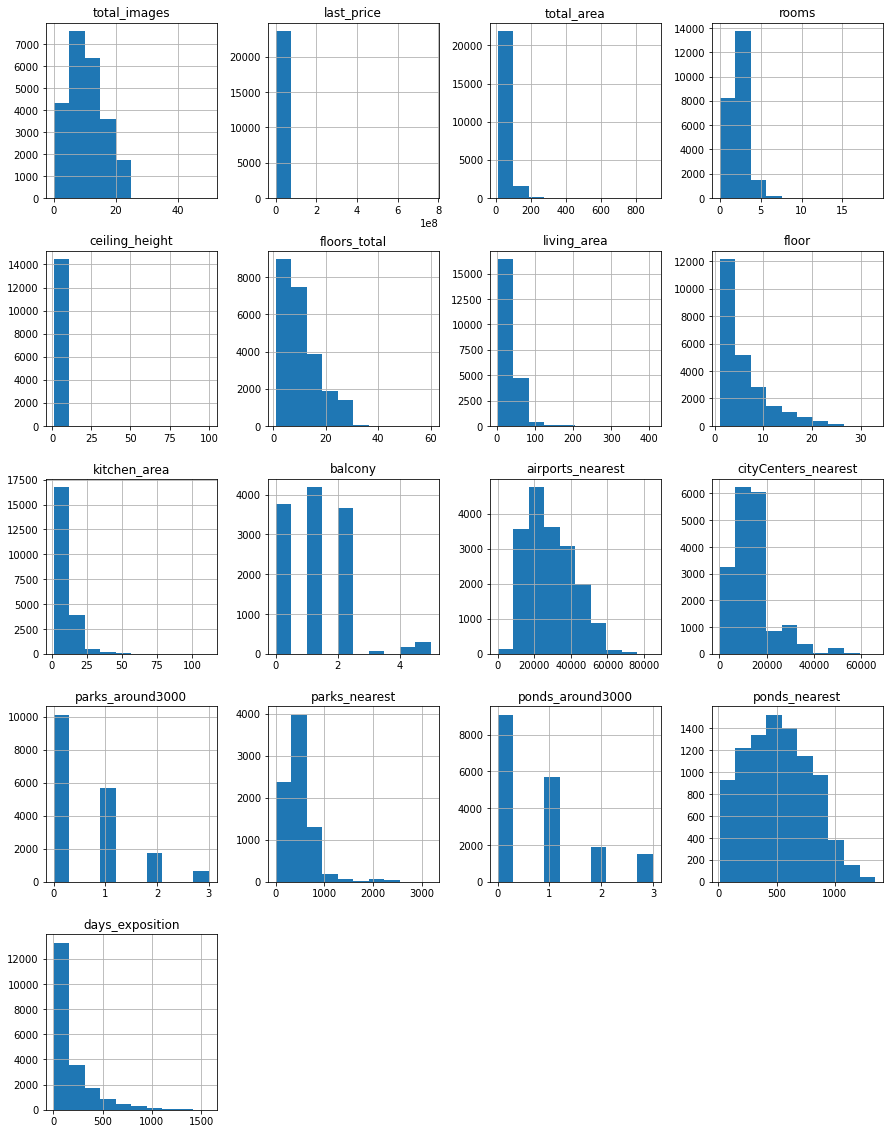

In [8]:
data.hist(figsize=(15, 20));

Вывод

1. Присутствуют пропущенные значения в 14 столбцах:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

2. Нарушение стиля в названии стобцов: 
- parks_around3000
- ponds_around3000
- cityCenters_nearest 

3. Аномальные данные в столбцах


4. Несоотвествие формата стобцов.
Из формата float в формат int:
- last_price
- floors_total
- balcony
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- airports_nearest
- cityCenters_nearest
- days_exposition

Из формата object в формат datetime:
- first_day_exposition

Из формата object в формат bool: 
- is_apartment


### Выполните предобработку данных

#### Анализ пропусков

Доля пропущенных значений в столбце 'total_images': 0.0%
Доля пропущенных значений в столбце 'last_price': 0.0%
Доля пропущенных значений в столбце 'total_area': 0.0%
Доля пропущенных значений в столбце 'first_day_exposition': 0.0%
Доля пропущенных значений в столбце 'rooms': 0.0%
Доля пропущенных значений в столбце 'ceiling_height': 38.8%
Доля пропущенных значений в столбце 'floors_total': 0.4%
Доля пропущенных значений в столбце 'living_area': 8.0%
Доля пропущенных значений в столбце 'floor': 0.0%
Доля пропущенных значений в столбце 'is_apartment': 88.3%
Доля пропущенных значений в столбце 'studio': 0.0%
Доля пропущенных значений в столбце 'open_plan': 0.0%
Доля пропущенных значений в столбце 'kitchen_area': 9.6%
Доля пропущенных значений в столбце 'balcony': 48.6%
Доля пропущенных значений в столбце 'locality_name': 0.2%
Доля пропущенных значений в столбце 'airports_nearest': 23.4%
Доля пропущенных значений в столбце 'cityCenters_nearest': 23.3%
Доля пропущенных значений в столбце '

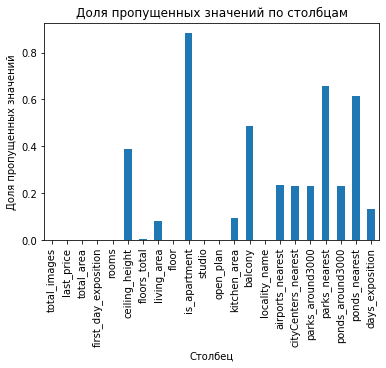

In [9]:
def analyze_missing_values(data):
    total_rows = data.shape[0]
    
    for column in data.columns:
        missing_count = data[column].isna().sum()
        missing_percentage = missing_count / total_rows
        
        print(f"Доля пропущенных значений в столбце '{column}': {missing_percentage:.1%}")
analyze_missing_values(data)

data.isnull().mean().plot(kind='bar')
plt.title('Доля пропущенных значений по столбцам')
plt.xlabel('Столбец')
plt.ylabel('Доля пропущенных значений')
plt.show()

#### Переименуем столбцы с нарушением стиля

In [10]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
             'parks_around3000':'parks_around_3000',
             'ponds_around3000':'ponds_around_3000'})
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


#### Выведим информацию о пропусках 

In [11]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

#### Удаление пропусков в столбце locality_name

In [12]:
missing_count = data['locality_name'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 49
Процент пропущенных значений: 0.21%


In [13]:
data['locality_name']

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

In [14]:
data.dropna(subset=['locality_name'], inplace=True)

In [15]:
missing_count = data['locality_name'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Удаление пропусков в столбце floors_total

In [16]:
missing_count = data['floors_total'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 85
Процент пропущенных значений: 0.36%


In [17]:
data['floors_total']

0        16.0
1        11.0
2         5.0
3        14.0
4        14.0
         ... 
23694     5.0
23695     5.0
23696     3.0
23697    17.0
23698     5.0
Name: floors_total, Length: 23650, dtype: float64

In [18]:
data.dropna(subset=['floors_total'], inplace=True)

In [19]:
missing_count = data['floors_total'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполним пропусски в столбце ceiling_height

In [20]:
missing_count = data['ceiling_height'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 9084
Процент пропущенных значений: 38.55%


In [21]:
data['ceiling_height']

0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23565, dtype: float64

In [22]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))

In [23]:
missing_count = data['ceiling_height'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 120
Процент пропущенных значений: 0.51%


In [24]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
110,6,3.85e+06,72.30,2017-09-29T00:00:00,2,NaN,3.0,27.4,2,NaN,False,False,23.6,0.0,деревня Пикколово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
168,9,2.25e+06,73.00,2018-11-14T00:00:00,3,NaN,5.0,43.4,5,NaN,False,False,8.4,NaN,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,46.0
986,10,1.95e+06,62.00,2015-02-19T00:00:00,3,NaN,5.0,NaN,5,NaN,False,False,NaN,NaN,поселок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1.15e+06,33.00,2016-11-28T00:00:00,1,NaN,3.0,NaN,3,False,False,False,NaN,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
1625,7,1.98e+06,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22918,14,2.05e+06,54.00,2019-04-17T00:00:00,2,NaN,5.0,32.0,4,NaN,False,False,9.0,2.0,посёлок Перово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22935,8,7.99e+05,47.20,2018-06-16T00:00:00,2,NaN,5.0,30.6,3,NaN,False,False,6.3,1.0,поселок Володарское,NaN,NaN,NaN,NaN,NaN,NaN,5.0
23048,7,2.45e+06,53.60,2018-07-10T00:00:00,2,NaN,5.0,28.4,2,NaN,False,False,8.8,NaN,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23354,18,9.00e+05,42.60,2018-02-26T00:00:00,2,NaN,2.0,28.0,1,NaN,False,False,9.0,NaN,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0


Оставшиеся пустые значения меняем на медианное значение расчитанное по всей базе данных.

In [25]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [26]:
missing_count = data['ceiling_height'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце living_area

In [27]:
missing_count = data['living_area'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 1865
Процент пропущенных значений: 7.91%


In [28]:
data['living_area']

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23565, dtype: float64

In [29]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))

In [30]:
missing_count = data['living_area'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 133
Процент пропущенных значений: 0.56%


Оставшиеся пустые значения заполняем произведением total_area конкретного объекта на коэфицент от медианных значений (total_area, living_area) расчитанных по всей базе данных.анных.

In [31]:
living_area = data['living_area'].median()/data['total_area'].median()
living_area

0.5769230769230769

In [32]:
data['living_area'] = data['living_area'].fillna(living_area * data['total_area'])

In [33]:
missing_count = data['living_area'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце is_apartment

In [34]:
missing_count = data['is_apartment'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 20805
Процент пропущенных значений: 88.29%


In [35]:
data['is_apartment']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    NaN
23698    NaN
Name: is_apartment, Length: 23565, dtype: object

Подсчитаем уникальные значения и их количество в is_apartment

In [36]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Пустые значения меняем на False.

In [37]:
data['is_apartment'].fillna(False, inplace=True)

In [38]:
data['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

In [39]:
missing_count = data['is_apartment'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце kitchen_area

In [40]:
missing_count = data['kitchen_area'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 2222
Процент пропущенных значений: 9.43%


In [41]:
data['kitchen_area']

0        25.00
1        11.00
2         8.30
3          NaN
4        41.00
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23565, dtype: float64

In [42]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))

In [43]:
missing_count = data['kitchen_area'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 185
Процент пропущенных значений: 0.79%


Оставшиеся пустые значения заполняем произведением total_area конкретного объекта на коэфицент от медианных значений (total_area, kitchen_area) расчитанных по всей базе данных.

In [44]:
kitchen_area = data['kitchen_area'].median()/data['total_area'].median()
kitchen_area

0.17307692307692307

In [45]:
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area * data['total_area'])

In [46]:
missing_count = data['kitchen_area'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце balcony

In [47]:
missing_count = data['balcony'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 11475
Процент пропущенных значений: 48.70%


In [48]:
data['balcony']

0        NaN
1        2.0
2        0.0
3        0.0
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: balcony, Length: 23565, dtype: float64

Заменим вещественный тип данных на целочисленный. Отсутствие информации о количестве балконов свидетельствует о том, что число балконов равно нулю.

In [49]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

In [50]:
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23565, dtype: int64

In [51]:
missing_count = data['balcony'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце airports_nearest

In [52]:
missing_count = data['airports_nearest'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 5524
Процент пропущенных значений: 23.44%


In [53]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2.89e+06,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2.90e+06,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3.89e+06,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5.00e+06,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2.20e+06,32.80,2018-02-19T00:00:00,1,2.56,9.0,17.50,2,False,False,False,7.20,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2.10e+06,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,False,False,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1.35e+06,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3.10e+06,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2.50e+06,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.70,1,False,False,False,8.00,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data['airports_nearest']

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23565, dtype: float64

In [55]:
data['airports_nearest'].fillna(data['airports_nearest'].median(), inplace=True)

In [56]:
missing_count = data['airports_nearest'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце city_centers_nearest

In [57]:
missing_count = data['city_centers_nearest'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 5501
Процент пропущенных значений: 23.34%


In [58]:
data[data['city_centers_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2.89e+06,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,26757.0,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2.90e+06,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,26757.0,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3.89e+06,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,False,False,9.00,0,Сертолово,26757.0,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5.00e+06,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2,деревня Кудрово,26757.0,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2.20e+06,32.80,2018-02-19T00:00:00,1,2.56,9.0,17.50,2,False,False,False,7.20,0,Коммунар,26757.0,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2.10e+06,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,False,False,5.50,0,посёлок Дзержинского,26757.0,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1.35e+06,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,False,False,6.00,0,Тихвин,26757.0,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3.10e+06,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,False,False,8.50,0,Тосно,26757.0,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2.50e+06,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.70,1,False,False,False,8.00,0,село Рождествено,26757.0,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data['city_centers_nearest']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23565, dtype: float64

In [60]:
data['city_centers_nearest'].fillna(data['city_centers_nearest'].median(), inplace=True)

In [61]:
missing_count = data['city_centers_nearest'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце parks_around_3000

In [62]:
missing_count = data['parks_around_3000'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 5500
Процент пропущенных значений: 23.34%


In [63]:
data['parks_around_3000']

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23694    1.0
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: parks_around_3000, Length: 23565, dtype: float64

Заменим вещественный тип данных, используемый для хранения информации о расстоянии до парка, на целочисленный. Это имеет смысл, так как расстояние до парка обычно измеряется в целых единицах (метрах, километрах).
Таким образом, мы избавляемся от противоречия и приводим данные к более логичному виду.

In [64]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype(int)

In [65]:
missing_count = data['parks_around_3000'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце parks_nearest

In [66]:
missing_count = data['parks_nearest'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 15535
Процент пропущенных значений: 65.92%


In [67]:
data[data['parks_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3.35e+06,40.40,2018-12-04T00:00:00,1,2.62,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0.0,NaN,81.0
5,10,2.89e+06,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,26757.0,13096.5,0,NaN,NaN,NaN,55.0
6,6,3.70e+06,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0.0,NaN,155.0
7,5,7.92e+06,71.60,2019-04-18T00:00:00,2,2.70,24.0,44.30,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0.0,NaN,NaN
8,20,2.90e+06,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,26757.0,13096.5,0,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9.47e+06,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.30,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1.0,806.0,519.0
23692,2,1.35e+06,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,False,False,6.00,0,Тихвин,26757.0,13096.5,0,NaN,NaN,NaN,413.0
23695,14,3.10e+06,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,False,False,8.50,0,Тосно,26757.0,13096.5,0,NaN,NaN,NaN,45.0
23696,18,2.50e+06,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.70,1,False,False,False,8.00,0,село Рождествено,26757.0,13096.5,0,NaN,NaN,NaN,NaN


In [68]:
data['parks_nearest']

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23565, dtype: float64

In [69]:
data['parks_nearest'].fillna(data['parks_nearest'].median(), inplace=True)

In [70]:
missing_count = data['parks_nearest'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце ponds_around_3000

In [71]:
missing_count = data['ponds_around_3000'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 5500
Процент пропущенных значений: 23.34%


In [72]:
data['ponds_around_3000']

0        2.0
1        0.0
2        2.0
3        3.0
4        1.0
        ... 
23694    3.0
23695    NaN
23696    NaN
23697    3.0
23698    NaN
Name: ponds_around_3000, Length: 23565, dtype: float64

Заменим вещественный тип данных на целочисленный.

In [73]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype(int)

In [74]:
missing_count = data['ponds_around_3000'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце ponds_nearest

In [75]:
missing_count = data['ponds_nearest'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 14529
Процент пропущенных значений: 61.65%


In [76]:
data['ponds_nearest']

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23565, dtype: float64

In [77]:
data[data['ponds_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3.35e+06,40.40,2018-12-04T00:00:00,1,2.62,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,455.0,0,NaN,81.0
5,10,2.89e+06,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,26757.0,13096.5,0,455.0,0,NaN,55.0
6,6,3.70e+06,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,455.0,0,NaN,155.0
7,5,7.92e+06,71.60,2019-04-18T00:00:00,2,2.70,24.0,44.30,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,455.0,0,NaN,NaN
8,20,2.90e+06,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,26757.0,13096.5,0,455.0,0,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5.50e+06,52.00,2018-07-19T00:00:00,2,2.70,5.0,31.00,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15.0
23692,2,1.35e+06,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,False,False,6.00,0,Тихвин,26757.0,13096.5,0,455.0,0,NaN,413.0
23695,14,3.10e+06,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,False,False,8.50,0,Тосно,26757.0,13096.5,0,455.0,0,NaN,45.0
23696,18,2.50e+06,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.70,1,False,False,False,8.00,0,село Рождествено,26757.0,13096.5,0,455.0,0,NaN,NaN


In [78]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))

In [79]:
missing_count = data['ponds_nearest'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 5517
Процент пропущенных значений: 23.41%


Оставшиеся пустые значения меняем на медианное значение расчитанное по всей базе данных.

In [80]:
data['ponds_nearest'].fillna(data['ponds_nearest'].median(), inplace=True)

In [81]:
data['ponds_nearest']

0        755.0
1        584.5
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695    504.0
23696    504.0
23697    196.0
23698    504.0
Name: ponds_nearest, Length: 23565, dtype: float64

In [82]:
missing_count = data['ponds_nearest'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Заполнение пропусков в столбце days_exposition

In [83]:
missing_count = data['days_exposition'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 3171
Процент пропущенных значений: 13.46%


In [84]:
data['days_exposition']

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23565, dtype: float64

In [85]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,1.30e+07,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
7,5,7.92e+06,71.60,2019-04-18T00:00:00,2,2.70,24.0,44.3,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,455.0,0,504.0,NaN
44,13,5.35e+06,40.00,2018-11-18T00:00:00,1,2.70,22.0,18.0,3,False,False,False,10.00,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
45,17,5.20e+06,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,False,False,7.00,0,Санкт-Петербург,30011.0,12872.0,0,455.0,0,504.0,NaN
46,17,6.60e+06,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,False,False,8.30,2,Санкт-Петербург,15114.0,12702.0,0,455.0,0,504.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,2.14e+07,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,False,False,15.60,0,Санкт-Петербург,11827.0,11459.0,0,455.0,0,504.0,NaN
23685,15,2.49e+06,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,False,False,5.60,1,Ломоносов,48393.0,51818.0,0,455.0,0,553.0,NaN
23694,9,9.70e+06,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23696,18,2.50e+06,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.7,1,False,False,False,8.00,0,село Рождествено,26757.0,13096.5,0,455.0,0,504.0,NaN


In [86]:
data['days_exposition'] = data['days_exposition'].fillna(data.groupby('locality_name')['days_exposition'].transform('median'))

In [87]:
missing_count = data['days_exposition'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 80
Процент пропущенных значений: 0.34%


In [88]:
data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)

In [89]:
missing_count = data['days_exposition'].isna().sum()
print(f"Количество пропущенных значений: {missing_count}")

total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100
print(f"Процент пропущенных значений: {missing_percentage:.2f}%")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


#### Анализ пропусков

In [90]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### Проверка данных на аномалии

In [92]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.00,2.36e+04,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00
mean,9.88,6.54e+06,60.32,2.07,2.73,10.68,34.63,5.88,10.45,0.59,28318.86,13936.77,0.47,467.12,0.59,509.07,169.92
std,5.68,1.09e+07,35.66,1.08,1.01,6.59,22.47,4.87,5.90,0.96,11086.81,7555.48,0.75,200.10,0.88,174.94,206.88
min,0.00,1.22e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.40e+06,40.00,1.00,2.55,5.00,18.60,2.00,7.00,0.00,21166.00,10935.00,0.00,455.00,0.00,504.00,45.00
50%,9.00,4.65e+06,52.00,2.00,2.70,9.00,30.00,4.00,9.00,0.00,26757.00,13096.50,0.00,455.00,0.00,504.00,95.00
75%,14.00,6.79e+06,69.70,3.00,2.70,16.00,42.30,8.00,11.80,1.00,34324.00,15237.00,1.00,455.00,1.00,504.00,200.00
max,50.00,7.63e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Проведем анализ следующих данных: 
количество комнат(rooms) - min 0
высота потолков (ceiling_height) - min 1
жилая площадь (living_area) - min 2
площадь кухни (kitchen_area) - min 1.3

#### Проверка данных на аномалии  в колонке rooms

In [93]:
data['rooms'].describe()

count    23565.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

In [94]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2.45e+06,27.00,2017-03-30T00:00:00,0,2.70,24.0,15.50,2,False,True,False,5.50,2,посёлок Мурино,26757.0,13096.5,0,455.0,0,504.0,181.0
349,4,2.32e+06,25.00,2017-09-27T00:00:00,0,2.75,14.0,17.00,1,False,False,True,5.00,0,деревня Кудрово,26757.0,13096.5,0,455.0,0,504.0,45.0
440,8,2.48e+06,27.11,2018-03-12T00:00:00,0,2.70,17.0,24.75,4,False,True,False,4.69,2,Санкт-Петербург,38171.0,15015.0,0,455.0,2,982.0,64.0
508,0,3.38e+06,34.40,2017-03-28T00:00:00,0,2.64,26.0,24.30,19,False,False,True,8.70,1,посёлок Парголово,53115.0,19292.0,0,455.0,1,593.0,430.0
608,2,1.85e+06,25.00,2019-02-20T00:00:00,0,2.62,10.0,17.00,7,False,True,False,5.00,0,посёлок Шушары,26757.0,13096.5,0,455.0,0,584.5,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3.20e+06,26.00,2017-09-01T00:00:00,0,2.70,25.0,18.00,16,False,True,False,5.00,0,Санкт-Петербург,11405.0,13222.0,0,455.0,1,623.0,14.0
23442,0,2.50e+06,27.70,2017-09-28T00:00:00,0,2.70,24.0,18.00,4,False,False,True,4.79,2,посёлок Мурино,26757.0,13096.5,0,455.0,0,504.0,4.0
23554,15,3.35e+06,26.00,2018-09-07T00:00:00,0,2.70,19.0,17.38,8,False,True,False,5.00,0,Санкт-Петербург,18090.0,17092.0,0,455.0,2,112.0,31.0
23592,10,1.45e+06,29.00,2017-11-11T00:00:00,0,2.56,9.0,18.00,8,False,False,True,6.55,2,Никольское,26757.0,13096.5,0,455.0,0,504.0,82.0


Объекты могут являются как студиями так и однокомнатными квартирами. Присвоим нулевым значениям 1 комнату.

In [95]:
data['rooms'] = data['rooms'].replace(0, 1)

In [96]:
data['rooms'].describe()

count    23565.00
mean         2.08
std          1.07
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

#### Проверка данных на аномалии в колонке ceiling_height

In [97]:
data['ceiling_height'].describe()

count    23565.00
mean         2.73
std          1.01
min          1.00
25%          2.55
50%          2.70
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

Высота внутриквартирных коридоров, холлов должна составлять не менее 2,1 м. А по нашим данным min 1, max 100 что является аномальным

In [98]:
data.query('ceiling_height <= 2.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
552,11,3.00e+06,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.50,6,False,False,False,6.50,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270.0
2572,4,2.40e+06,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.00,4,False,False,False,6.00,1,Луга,26757.0,13096.5,0,455.0,0,504.0,63.0
4212,1,2.12e+06,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.60,9,False,False,False,8.80,2,Тосно,26757.0,13096.5,0,455.0,0,504.0,36.0
5712,5,1.50e+06,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.50,1,False,False,False,5.20,0,городской посёлок Мга,26757.0,13096.5,0,455.0,0,504.0,248.0
5850,9,1.65e+06,35.50,2018-05-29T00:00:00,1,2.00,5.0,17.15,5,False,False,False,8.50,0,Луга,26757.0,13096.5,0,455.0,0,504.0,100.0
11352,4,3.30e+06,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.20,12,False,False,False,10.10,0,посёлок Металлострой,25268.0,26980.0,0,455.0,0,504.0,53.0
16446,6,1.23e+07,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.90,2,False,False,False,12.00,0,Санкт-Петербург,38415.0,7675.0,1,568.0,1,154.0,95.0
16884,0,1.50e+06,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.00,5,False,False,False,6.00,0,Выборг,26757.0,13096.5,0,455.0,0,504.0,6.0
16934,5,4.10e+06,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.40,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0,455.0,3,80.0,71.0
19098,7,2.70e+06,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.00,1,False,False,False,6.00,0,Выборг,26757.0,13096.5,0,455.0,0,504.0,282.0


Высота потолков на 14 объектах ниже нормы 2.1. 
Присвоим медианное значение рассчитанное по всей базе данных.

In [99]:
data.ceiling_height.median()

2.7

In [100]:
data['ceiling_height'] = data['ceiling_height'].mask(data['ceiling_height'] < 2.1, data['ceiling_height'].median())

In [101]:
data['ceiling_height'].describe()

count    23565.00
mean         2.73
std          1.01
min          2.20
25%          2.55
50%          2.70
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

#### Проверка данных на аномалии в колонке living_area

In [102]:
data['living_area'].describe()

count    23565.00
mean        34.63
std         22.47
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

В Санкт-Петербурге действуют нормы:

9 м2 общей площади жилого помещения для проживающих в отдельных квартирах и жилых домах;

In [103]:
living_area_norm = 9
median_area_ratio = data['living_area'].median() / data['total_area'].median()
min_living_area = living_area_norm * median_area_ratio
data_anomalies = data[data['living_area'] <= min_living_area]

print(f"Найдено {len(data_anomalies)} строк с аномально маленькой жилой площадью:")
data_anomalies

Найдено 5 строк с аномально маленькой жилой площадью:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3242,7,4.44e+06,41.0,2017-07-02T00:00:00,1,2.7,17.0,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0,455.0,0,504.0,216.0
13915,20,6.35e+06,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0,455.0,1,1012.0,91.0
17582,11,2.68e+06,22.0,2018-08-11T00:00:00,1,2.7,25.0,5.0,8,False,True,False,5.3,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0
21758,0,2.33e+06,23.0,2018-01-01T00:00:00,1,2.7,24.0,2.0,22,False,True,False,5.0,0,посёлок Мурино,26757.0,13096.5,0,455.0,0,504.0,66.0
23574,14,6.50e+07,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,False,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,280.0


Вычисляем медиану living_area и заменим значения меньше 9 м2 на медиану

In [104]:
median_living_area = data['living_area'].median()
data.loc[data['living_area'] <= 9, 'living_area'] = median_living_area

In [105]:
data['living_area'].describe()

count    23565.00
mean        34.66
std         22.46
min          9.10
25%         18.70
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

#### Проверка данных на аномалии в колонке kitchen_area

In [106]:
data['kitchen_area'].describe()

count    23565.00
mean        10.45
std          5.90
min          1.30
25%          7.00
50%          9.00
75%         11.80
max        112.00
Name: kitchen_area, dtype: float64

По кухне никаких норм не выявлено, поэтому оставляем без изменения

#### Результаты проверки данных на аномалии

In [107]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.00,2.36e+04,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00
mean,9.88,6.54e+06,60.32,2.08,2.73,10.68,34.66,5.88,10.45,0.59,28318.86,13936.77,0.47,467.12,0.59,509.07,169.92
std,5.68,1.09e+07,35.66,1.07,1.01,6.59,22.46,4.87,5.90,0.96,11086.81,7555.48,0.75,200.10,0.88,174.94,206.88
min,0.00,1.22e+04,12.00,1.00,2.20,1.00,9.10,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.40e+06,40.00,1.00,2.55,5.00,18.70,2.00,7.00,0.00,21166.00,10935.00,0.00,455.00,0.00,504.00,45.00
50%,9.00,4.65e+06,52.00,2.00,2.70,9.00,30.00,4.00,9.00,0.00,26757.00,13096.50,0.00,455.00,0.00,504.00,95.00
75%,14.00,6.79e+06,69.70,3.00,2.70,16.00,42.30,8.00,11.80,1.00,34324.00,15237.00,1.00,455.00,1.00,504.00,200.00
max,50.00,7.63e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


#### Изменение типов данных

In [108]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,1.30e+07,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0
1,7,3.35e+06,40.4,2018-12-04T00:00:00,1,2.62,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,455.0,0,584.5,81.0
2,10,5.20e+06,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,6.49e+07,159.0,2015-07-24T00:00:00,3,2.70,14.0,95.0,9,False,False,False,15.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,1.00e+07,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [109]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

Приведем столбец first_day_exposition к нормальной форме datetime.

In [110]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')

In [111]:
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]

In [112]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,1.30e+07,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0
1,7,3.35e+06,40.4,2018-12-04,1,2.62,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,455.0,0,584.5,81.0
2,10,5.20e+06,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,6.49e+07,159.0,2015-07-24,3,2.70,14.0,95.0,9,False,False,False,15.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,1.00e+07,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Заменим вещественный тип данных на целочисленный в столбах last_price и floors_total.

In [113]:
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### Удаление дубликатов

Искать неявные дубликаты целесообразно только столбцы с типом данных object. В столбцах с типом данных int и float неявные дубликаты не выделишь. Только - locality_name.

In [115]:
data.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [116]:
data['locality_name'].nunique()

364

In [117]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [118]:
data['locality_name'].nunique()

330

In [119]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', 'поселок ', regex=True)

In [120]:
data['locality_name'] = data['locality_name'].where(~data['locality_name'].isna(),'unknown')
data['locality_name'].isna().sum()

0

In [121]:
data.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

### Добавьте в таблицу новые столбцы

#### Добавляем параметр price_sq_meter с расчетом 1 кв м

In [125]:
data['price_sq_meter'] = data['last_price'] / data['total_area']

In [126]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0,120370.37
1,7,3350000,40.4,2018-12-04,1,2.62,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,455.0,0,584.5,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000,159.0,2015-07-24,3,2.70,14,95.0,9,False,False,False,15.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00


#### Добавление параметра с днем недели публикации объявления

In [127]:
data['weekday_publications'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [128]:
data['weekday_publications']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday_publications, Length: 23565, dtype: int64

#### Добавление параметра с месяцем публикации объявления

In [129]:
data['month_publications'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [130]:
data['month_publications']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_publications, Length: 23565, dtype: int64

#### Добавление параметра с годом публикации объявления

In [132]:
data['year_publications'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [133]:
data['year_publications']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_publications, Length: 23565, dtype: int64

In [134]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,weekday_publications,month_publications,year_publications
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.62,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,455.0,0,584.5,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14,95.0,9,False,False,False,15.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


#### Функция, определяющая категорию этажа

In [136]:
def apartment_floors_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['apartment_floors'] = data.apply(apartment_floors_group, axis=1)

In [138]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,weekday_publications,month_publications,year_publications,apartment_floors
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0,120370.37,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.62,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,455.0,0,584.5,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.70,14,95.0,9,False,False,False,15.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой


#### Добавим расстояние до центра города в километрах

In [142]:
data['city_center_distance_km'] = data.apply(lambda row: round(row['city_centers_nearest'] / 1000), axis=1)

In [143]:
data['city_center_distance_km']

0        16
1        19
2        14
3         7
4         8
         ..
23694     4
23695    13
23696    13
23697    10
23698    13
Name: city_center_distance_km, Length: 23565, dtype: int64

Добавлены столбцы со значениями:

1. Цена за 1 кв.м. (price_sq_meter)
2. День объявления (weekday_publications)
3. Месяц объявления (month_publications)
4. Год объявления (year_publications)
5. Категория этажа (apartment_floors)
6. Расстояние до центра города в километрах (city_center_distance_km)

### Проведите исследовательский анализ данных

#### Как быстро продавались квартиры

In [145]:
data['days_exposition'].sort_values(ascending=False).head(10)

18843    1580.0
1109     1572.0
9553     1553.0
1885     1513.0
20969    1512.0
6691     1512.0
14093    1497.0
15313    1489.0
19123    1485.0
11955    1484.0
Name: days_exposition, dtype: float64

In [147]:
data['days_exposition'].describe()

count    23565.00
mean       169.92
std        206.88
min          1.00
25%         45.00
50%         95.00
75%        200.00
max       1580.00
Name: days_exposition, dtype: float64

In [148]:
data['days_exposition'].median()

95.0

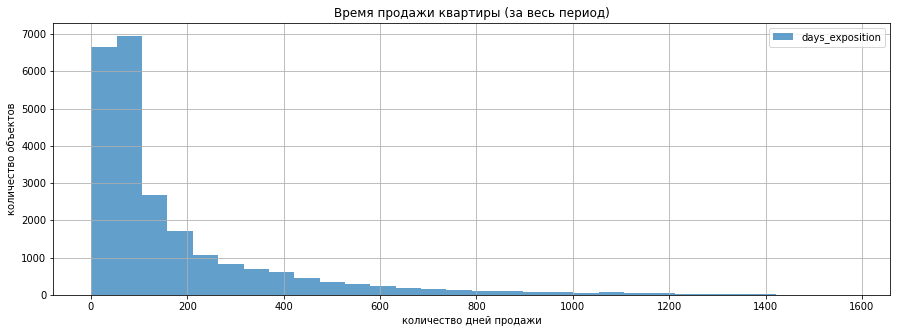

In [149]:
data['days_exposition'].hist(bins=30, legend=True,alpha=0.7, figsize = (15,5)).set(title='Время продажи квартиры (за весь период)', 
    xlabel='количество дней продажи', ylabel='количество объектов');

На рынке недвижимости квартиры в среднем продаются за 181 день, но медианный срок составляет 95 дней, указывая на более быстрые продажи для половины случаев. Минимальный срок продажи — 1 день, максимальный — 1580 дней (более 4 лет). Большинство квартир продается приблизительно за 100 дней. Быстрыми считаются продажи до 45 дней (первый квартиль), долгими — свыше 231 дня (четвертый квартиль).

#### Анализ общей площади

In [153]:
data['total_area'].describe()

count    23565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

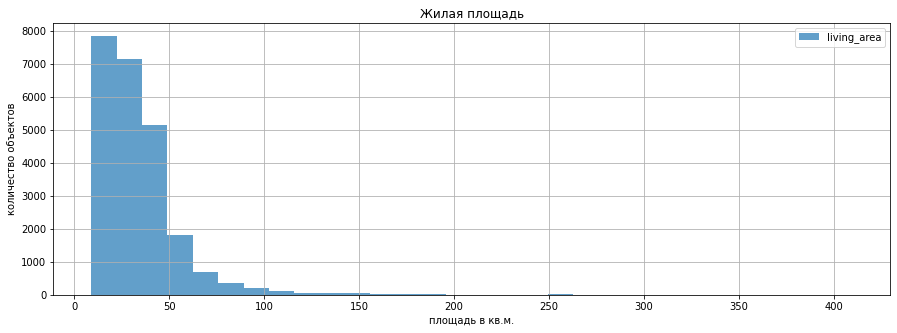

In [154]:
data['living_area'].hist(bins = 30, legend=True, alpha=0.7, figsize = (15,5)).set(title='Жилая площадь', 
    xlabel='площадь в кв.м.', ylabel='количество объектов');

На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров общей площади

#### Анализ жилой площади

In [155]:
data['living_area'].describe()

count    23565.00
mean        34.66
std         22.46
min          9.10
25%         18.70
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

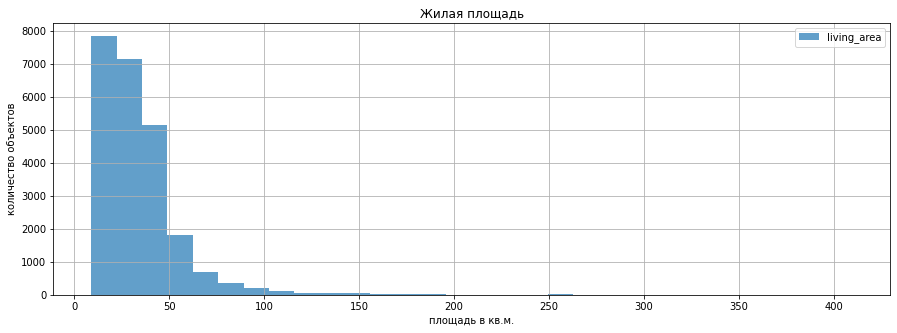

In [156]:
data['living_area'].hist(bins = 30, legend=True, alpha=0.7, figsize = (15,5)).set(title='Жилая площадь', 
    xlabel='площадь в кв.м.', ylabel='количество объектов');

Основной диапазон жилой площади приблизительно находится от 18 кв.м до 42 кв.м 

#### Анализ площади кухни

In [159]:
data['kitchen_area'].describe()

count    23565.00
mean        10.45
std          5.90
min          1.30
25%          7.00
50%          9.00
75%         11.80
max        112.00
Name: kitchen_area, dtype: float64

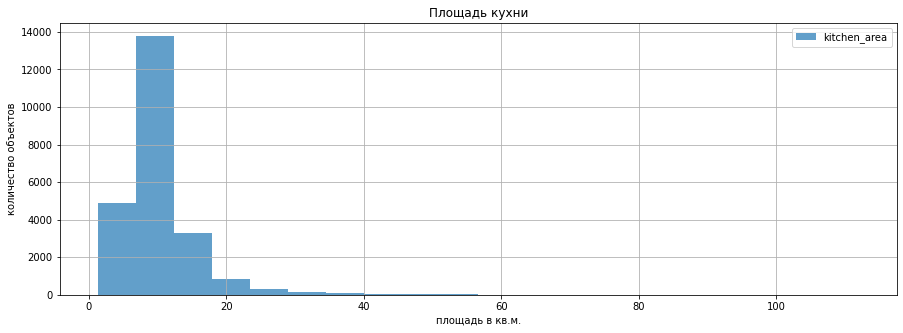

In [160]:
data['kitchen_area'].hist(bins=20, legend=True,alpha=0.7, figsize = (15,5)).set(title='Площадь кухни', 
    xlabel='площадь в кв.м.', ylabel='количество объектов');

Прослеживается тенденция что больше всего предложений с площадью кухни в 6 метров затем 9 и 12 кв.метром 

#### Анализ цены объекта

In [162]:
data['last_price'].describe()

count    2.36e+04
mean     6.54e+06
std      1.09e+07
min      1.22e+04
25%      3.40e+06
50%      4.65e+06
75%      6.79e+06
max      7.63e+08
Name: last_price, dtype: float64

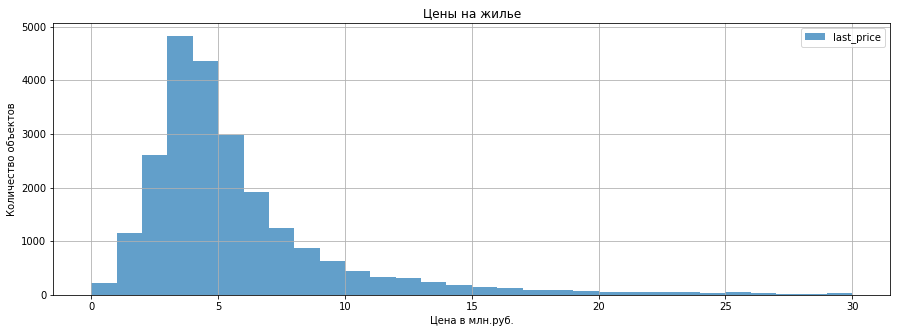

In [174]:
ax = (data['last_price'] / 1000000).hist(bins=30, range=(0, 30), legend=True, alpha=0.7, figsize=(15, 5))
ax.set(title='Цены на жилье', xlabel='Цена в млн.руб.', ylabel='Количество объектов')
plt.show()

Цены на квартиры в основном находятся в диапазоне 2-6 млн.руб. с пиком в области 3-6 млн.руб.

#### Анализ количества комнат

In [176]:
data['rooms'].describe()

count    23565.00
mean         2.08
std          1.07
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

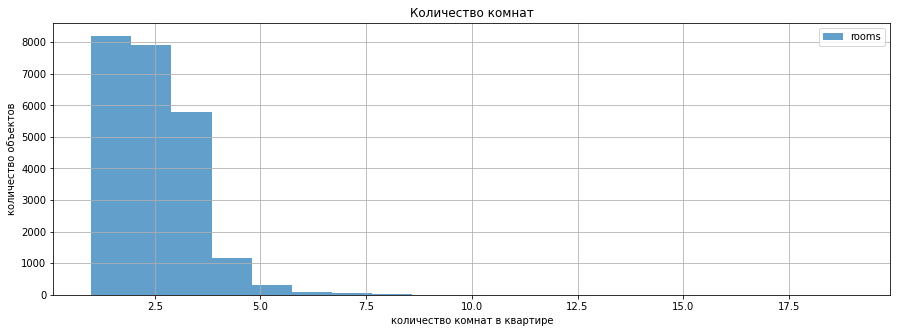

In [177]:
data['rooms'].hist(bins = data['rooms'].max(), legend=True,alpha=0.7, figsize = (15,5)).set(title='Количество комнат', 
    xlabel='количество комнат в квартире', ylabel='количество объектов');

Большая часть квартир являются 1-3 комнатными.

#### Анализ высоты потолков

In [178]:
data['ceiling_height'].describe()

count    23565.00
mean         2.73
std          1.01
min          2.20
25%          2.55
50%          2.70
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

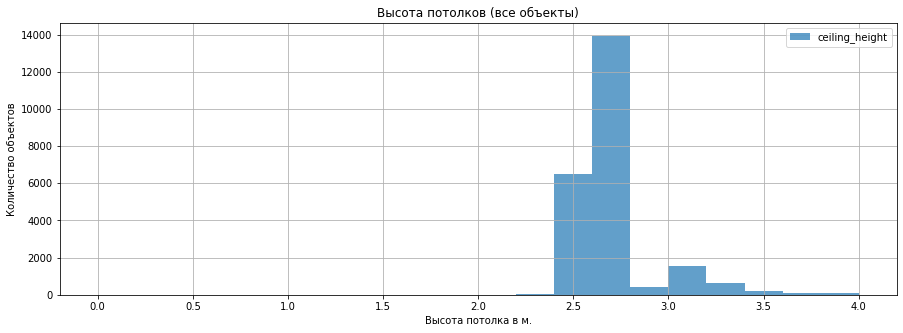

In [180]:
ax = data['ceiling_height'].hist(bins=20, range=(0, 4), legend=True, alpha=0.7, figsize=(15, 5))
ax.set(title='Высота потолков (все объекты)', xlabel='Высота потолка в м.', ylabel='Количество объектов')
plt.show()

Высота потолка в основном от 2.5 до 2.7 м 

#### Тип этажа квартиры («первый», «последний», «другой»)

In [183]:
data['apartment_floors'].describe()

count      23565
unique         3
top       другой
freq       17326
Name: apartment_floors, dtype: object

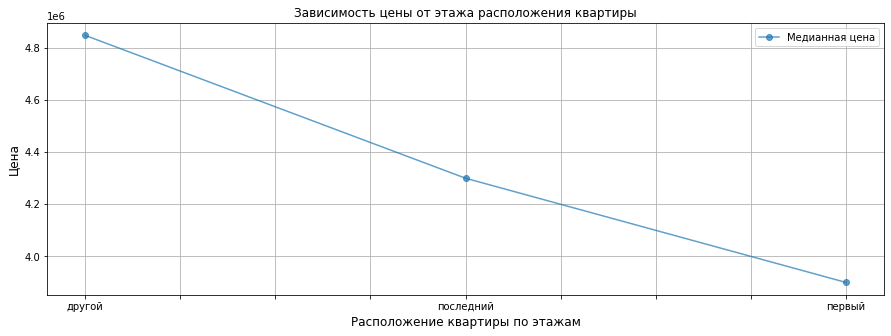

In [186]:
ax = (
    data.pivot_table(index='apartment_floors', values='last_price', aggfunc='median')
    .sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(15, 5), legend=True, alpha=0.7, title='Зависимость цены от этажа расположения квартиры')
)

ax.set_xlabel('Расположение квартиры по этажам', fontsize=12)
ax.set_ylabel('Цена', fontsize=12)
ax.legend(['Медианная цена'])

plt.show()

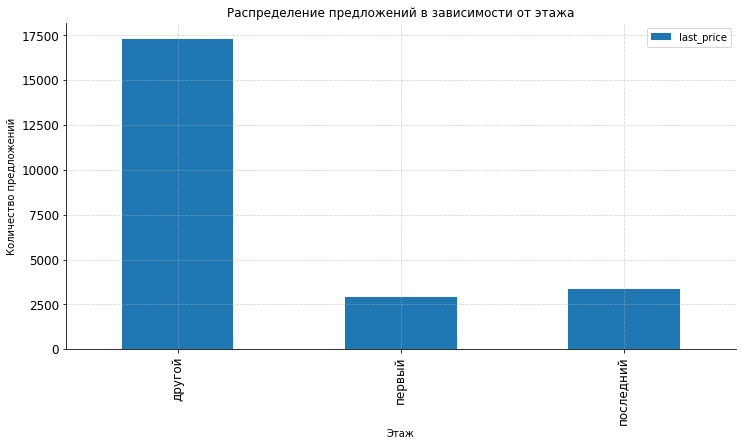

In [191]:
fig, ax = plt.subplots(figsize=(12, 6))

data.pivot_table(index='apartment_floors', values='last_price', aggfunc='count').plot(kind='bar', ax=ax)
ax.set_title('Распределение предложений в зависимости от этажа')
ax.set_xlabel('Этаж')
ax.set_ylabel('Количество предложений')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

Менее ценными считаются квартиры на "Первом" и "Последнем" этаже. На диаграмме заметно, что общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 20% от общего количества предложений.

#### Анализ общего количества этажей в доме

In [193]:
data['floors_total'].describe()

count    23565.00
mean        10.68
std          6.59
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

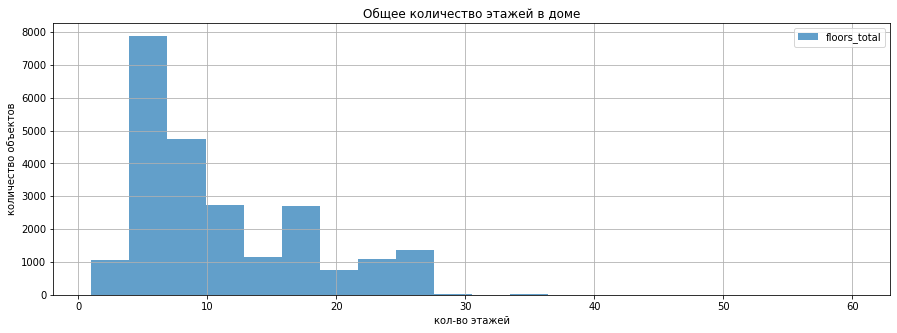

In [194]:
data['floors_total'].hist(bins=20, legend=True,alpha=0.7, figsize = (15,5)).set(title='Общее количество этажей в доме', 
    xlabel='кол-во этажей', ylabel='количество объектов');

Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.

#### Анализ расстояния до центра города в метрах

In [197]:
data['city_centers_nearest'].describe

<bound method NDFrame.describe of 0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695    13096.5
23696    13096.5
23697    10364.0
23698    13096.5
Name: city_centers_nearest, Length: 23565, dtype: float64>

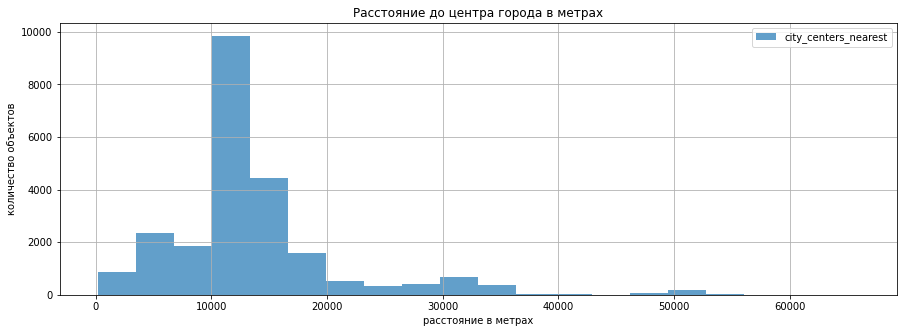

In [198]:
data['city_centers_nearest'].hist(bins=20, legend=True,alpha=0.7, figsize = (15,5)).set(title='Расстояние до центра города в метрах', 
    xlabel='расстояние в метрах', ylabel='количество объектов');

Больше всего предложений о продаже на расстоянии 10000 -15000 метров

#### Анализ расстояния до ближайшего парка

In [200]:
data['parks_nearest'].describe()

count    23565.00
mean       467.12
std        200.10
min          1.00
25%        455.00
50%        455.00
75%        455.00
max       3190.00
Name: parks_nearest, dtype: float64

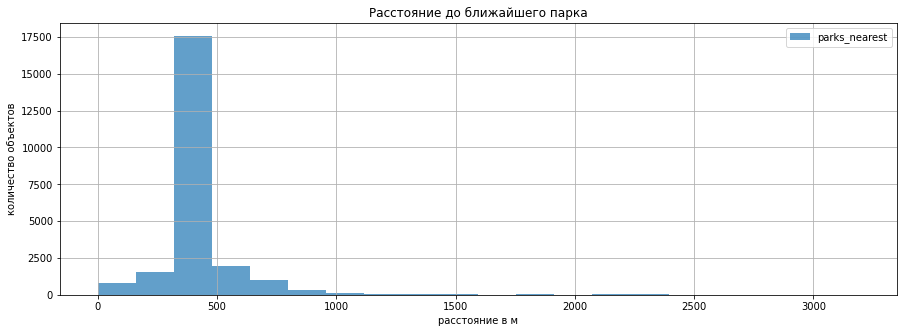

In [202]:
data['parks_nearest'].hist(bins=20, legend=True,alpha=0.7, figsize = (15,5)).set(title='Расстояние до ближайшего парка', 
    xlabel='расстояние в м', ylabel='количество объектов');

В основном все дома расположены возле парка, лишь некоторая часть находится в удаленности более 1 км.

Вывод

Общая или жилая площадь и количество комнат влияет на цену квартиры. Квартиры на последнем этаже, стоят гораздо дешевле, чем квартиры на других этажах. Квартиры на первом этаже самые дешевые. Наблюдается просадка цены в пятницу и воскресенье, повышение цены происходит во вторник, в остальные дни цена сохраняется приблизительно на одном уровне.

#### 10 населённых пунктов с наибольшим числом объявлений

In [208]:
locality_name_sorted_pivot_table = (data.pivot_table(index = 'locality_name', values = ["price_sq_meter"], aggfunc = ["count","mean"]))

locality_name_sorted_pivot_table.columns = ["count","mean"]

locality_name_sorted_pivot_table.sort_values(by = "count",inplace = True,ascending = False)

locality_name_sorted_pivot_table = locality_name_sorted_pivot_table[:10]

locality_name_sorted_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.88
поселок Мурино,552,85629.57
поселок Шушары,439,78551.34
Всеволожск,398,68654.47
Пушкин,369,103125.82
Колпино,338,75424.58
поселок Парголово,327,90175.91
Гатчина,307,68746.15
деревня Кудрово,299,92473.55


In [209]:
locality_name_sorted_pivot_table.query('mean == mean.min() or mean == mean.max()')

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.88
Выборг,237,58141.91


Вывод

Максимальная средняя стоимость жилья - Санкт-Петербург (114 тыс.за кв.м.), минимальная - Выборг (58 тыс.за кв.м.)

#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра

In [220]:
data.query('locality_name == "Санкт-Петербург"')['city_center_distance_km'].describe()

count    15651.00
mean        11.59
std          4.85
min          0.00
25%          8.00
50%         12.00
75%         15.00
max         29.00
Name: city_center_distance_km, dtype: float64

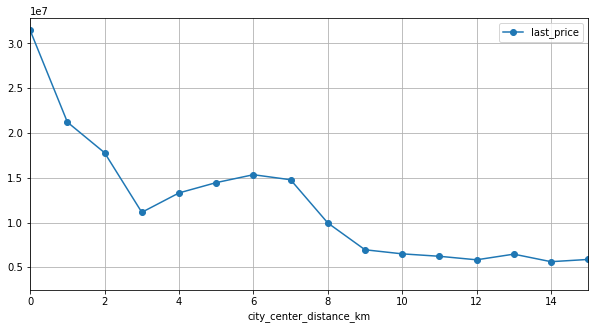

In [230]:
(data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center_distance_km', values='last_price',aggfunc='mean')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5)))
plt.show()

Самые дорогие квартиры в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 7 километров, далее стоимость не зависит от удаления.

In [238]:
spb_center = data.query('(locality_name == "Санкт-Петербург") & (city_center_distance_km <= 7)')

In [259]:
def frame_plot(frame,list_of_columns):
    for column in list_of_columns:
        frame[column].hist(bins = 15,figsize = (15,5))
        plt.title(column)
        plt.show()

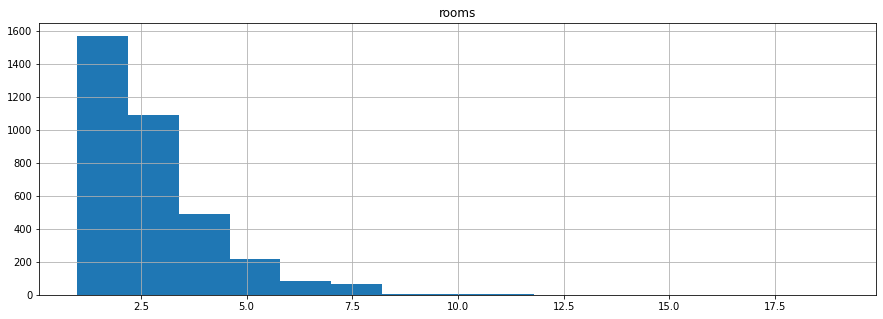

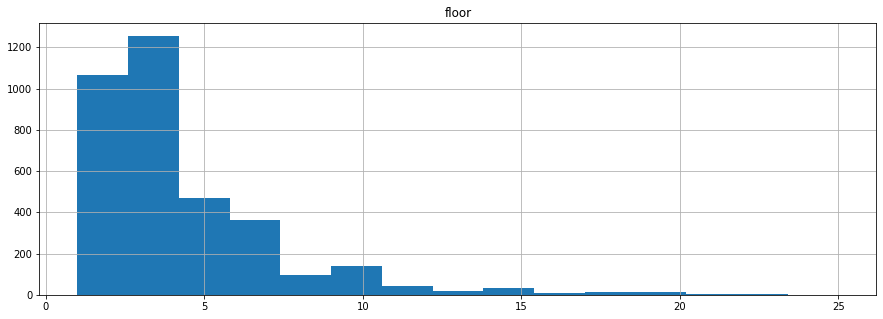

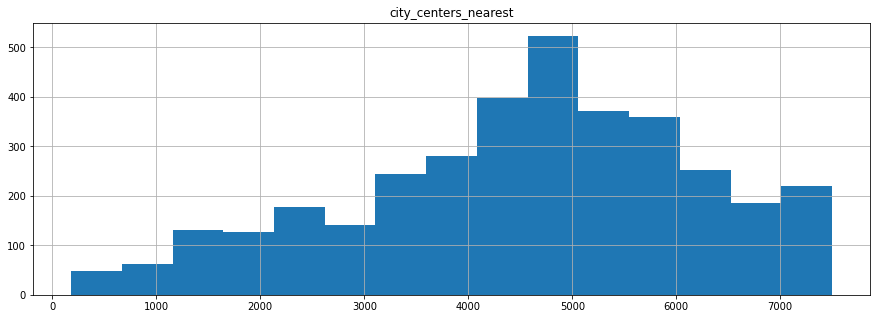

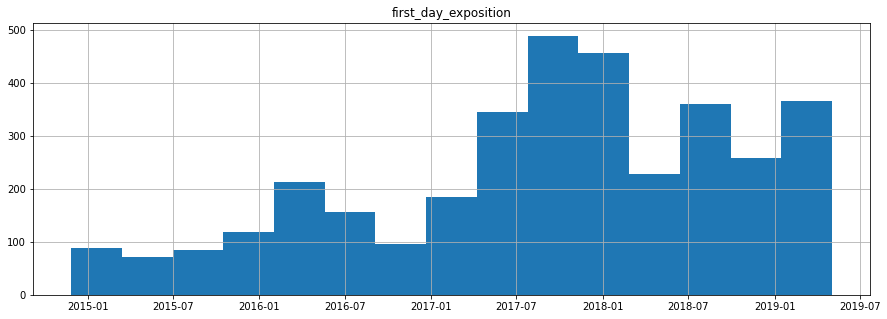

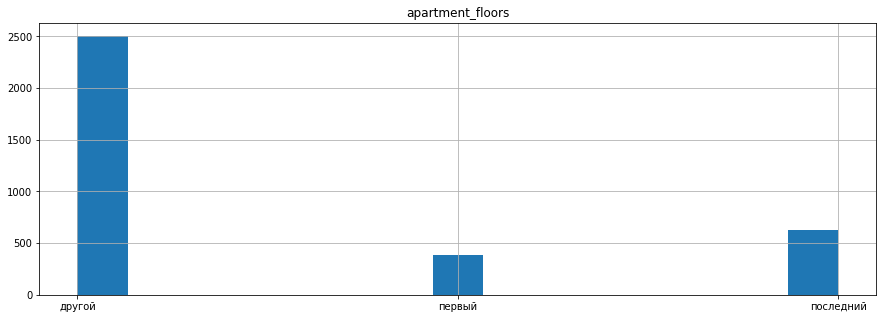

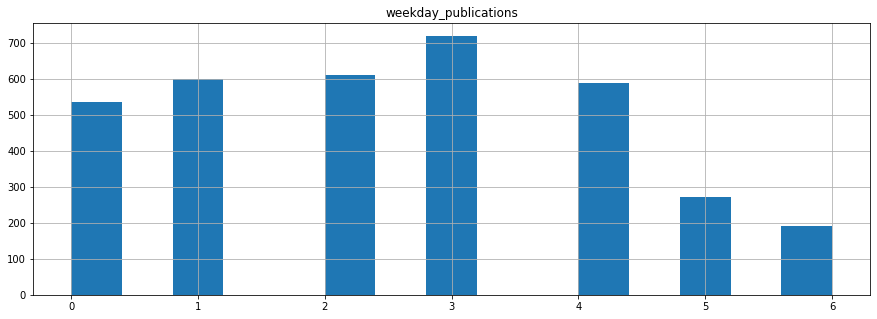

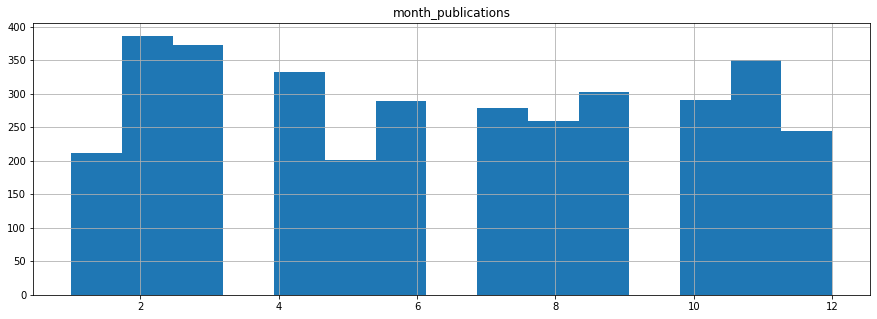

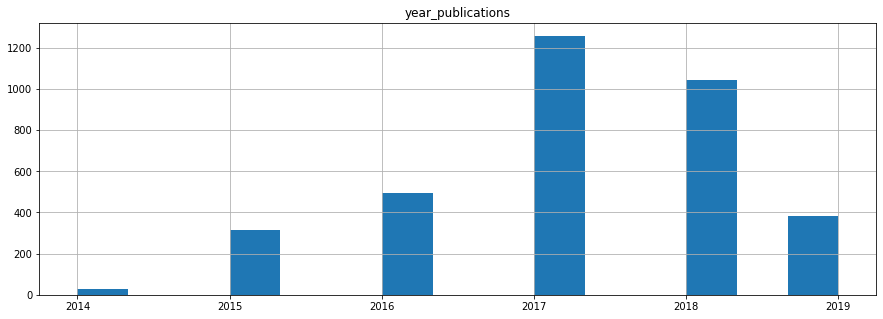

In [260]:
list_of_columns_spb = ['rooms'
                       ,'floor'
                       ,'city_centers_nearest'
                       ,'first_day_exposition'
                       ,'apartment_floors'
                       ,'weekday_publications'
                       ,'month_publications'
                       ,'year_publications']
frame_plot(spb_center,list_of_columns_spb)

Анализируя зависимость стоимости квартир в центре города от различных факторов, можно сделать следующие выводы:

- Число комнат: В центре города цена квартиры зависит от количества комнат так же, как и в остальных районах города. Это означает, что увеличение числа комнат обычно приводит к пропорциональному увеличению стоимости жилья.

- Площадь: Самый сильный фактор, влияющий на стоимость квартиры в центре, - это ее площадь. Чем больше площадь квартиры, тем выше ее цена.

- Высота потолков: Минимальное влияние на цену оказывает высота потолков в квартире. Это означает, что изменения в этом параметре мало влияют на общую стоимость недвижимости.

- Расположение относительно центра: Цены на квартиры повышаются по мере удаления от центральной части города, что может быть связано с более высоким спросом и удобством местоположения в центре.

- Этажность: Наиболее востребованы квартиры, расположенные не на первом и не на последнем этажах. Это может быть обусловлено предпочтениями покупателей по безопасности, шуму и уровню приватности.

- Динамика рынка: Пик активности по продаже квартир приходится на 2017-2018 годы, после чего наблюдается снижение. Большинство объявлений о продаже публикуются в рабочие дни, а ежемесячные пики спроса приходятся на февраль-март и ноябрь. Это может указывать на сезонность на рынке недвижимости.

### Напишите общий вывод

#### Общий вывод

В целом, на рынке недвижимости Санкт-Петербурга и его окрестностей наблюдаются следующие тенденции:

- Средняя площадь квартир составляет 60 кв.м., с минимальной площадью 12 кв.м. и максимальной - 900 кв.м. Большинство квартир имеют площадь от 25 до 100 кв.м.
- Средняя стоимость квартир составляет 6,5 млн. рублей, с минимальной стоимостью 1,2 млн. рублей и максимальной - 763 млн. рублей. Большинство квартир стоит от 2 до 6 млн. рублей, но есть и эксклюзивные предложения.
- Среднее количество комнат в квартире - 2, с минимальным количеством 1 комнаты и максимальным - 19 комнат. Большинство квартир являются 1-, 2- и 3-комнатными, а также есть небольшая доля 4-комнатных квартир.
- Средняя высота потолков составляет 2,7 метра, с минимальной высотой 2,2 метра и максимальной - 100 метров. Большинство квартир имеют высоту потолков от 2,5 до 3 метров, а в просторных помещениях потолок может достигать 5 метров.
- Средний срок нахождения квартиры в продаже составляет 181 день, с медианной продажей за 95 дней. Минимальный срок продажи - 1 день, а максимальный - 1580 дней (свыше 4 лет). Большинство квартир продаются за срок в 100 дней, но есть и квартиры, проданные всего за несколько дней после публикации, а также те, что продавались несколько лет.
- Самая дорогая стоимость квадратного метра недвижимости наблюдается в Санкт-Петербурге (114,000 рублей за кв метр), а самая дешевая - в Выборге (58,000 рублей за кв метр).
- Число комнат в квартире влияет на ее цену, причем большее количество комнат обычно соответствует более высокой цене. Корреляция между числом комнат и ценой ниже, чем между площадью и ценой. Самые дорогие квартиры находятся в центре города, но есть и дешевые варианты. Квартиры на первом этаже значительно дешевле, чем на других этажах, а последний этаж немного дороже.
- Стоимость квартир снижалась с 2014 по 2018 год, вероятно, из-за санкций и роста ставки рефинансирования, а с 2018 года наблюдается стабилизация и рост.
- Зависимость цены квартиры от числа комнат в центре города такая же, как и в целом по городу. Максимальная зависимость от площади, минимальная от высоты потолков. В центре есть очень дорогие однокомнатные квартиры. Стоимость повышается при удалении от центра, вероятно, из-за расположения формального центра города. В продаже в основном находятся квартиры, расположенные не на первом и не на последнем этаже. Пик публикаций объявлений приходится на 2017-2018 годы с последующим падением.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.